In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import files
files = files.upload()

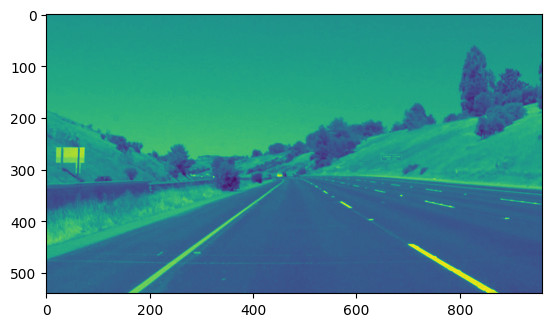

In [ ]:
img = cv.imread("img.png")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

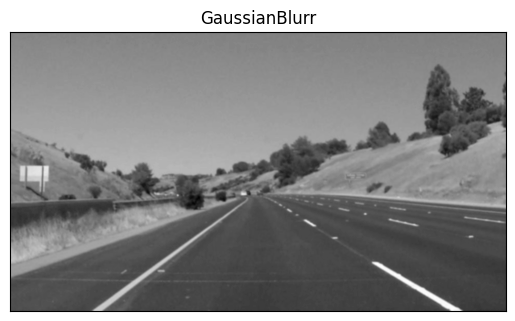

In [ ]:
blur = cv.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blur, cmap ="gray")
plt.title("GaussianBlurr"), plt.xticks([]), plt.yticks([])
plt.show()

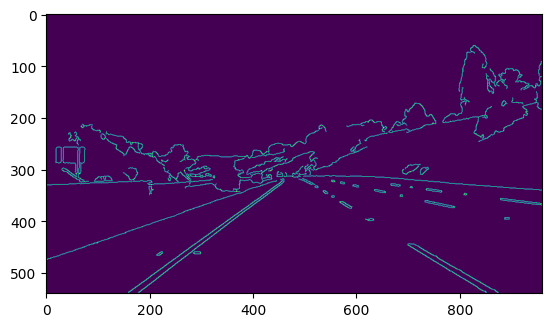

In [ ]:
edges = cv.Canny(blur, 50, 150)
plt.imshow(edges)
plt.show()

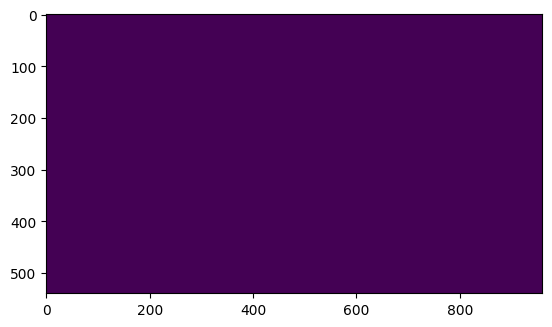

In [ ]:
mask = np.zeros_like(edges)
plt.imshow(mask)
plt.show()

In [ ]:
height, width = img.shape[:2]
roi_vertices = [(0, height), (width/2, height/2), (width, height)]
mask_color = 255
cv.fillPoly(mask, np.array([roi_vertices], dtype=np.int32), mask_color)
masked_edges = cv.bitwise_and(edges, mask)

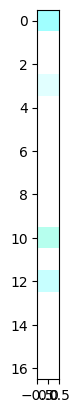

In [ ]:
lines = cv.HoughLinesP(masked_edges, rho=6, theta=np.pi/60, threshold=160, minLineLength=40, maxLineGap=25)
plt.imshow(lines)
plt.show()

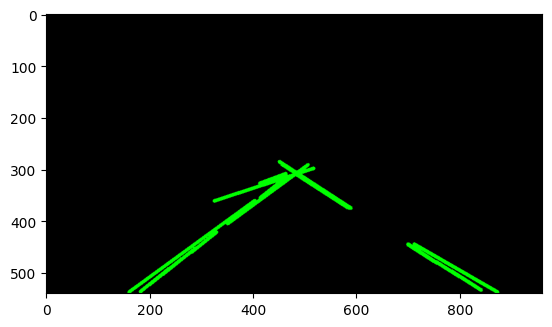

In [ ]:
line_image = np.zeros_like(img)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

plt.imshow(line_image)
plt.show()

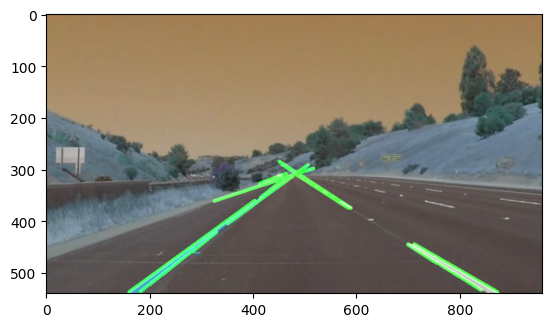

In [ ]:
final_image = cv.addWeighted(img, 0.8, line_image, 1, 0)
plt.imshow(final_image)
plt.show()